## Observations and Insights 

1. Capomulin and Ramicane resulted in much smaller tumor volume at the end of their mice's timepoint's when compared with the other drugs. Suggesting that these drugs might be the most efficient
2. Infubinol appears to have an outlier that should be thrown out or investigated.
3. There appears to be a rather strong correlation between tumor volume and mouse weight which intuitively makes sense.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mice = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
mice["Mouse ID"].nunique()

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice.duplicated(subset=["Mouse ID","Timepoint"])

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_duplicates = mice.loc[mice.duplicated(subset=["Mouse ID", "Timepoint"])=="True",:]
mice_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice.drop_duplicates(subset=["Mouse ID","Timepoint"])

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
mice["Mouse ID"].nunique()

249

## Summary Statistics

In [9]:
mice.value_counts("Drug Regimen")

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
dtype: int64

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_stats = mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
summary_stats = pd.DataFrame(summary_stats)
summary_stats = summary_stats.rename(columns={"Tumor Volume (mm3)" : "Tumor Volume Mean"})
median = mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
summary_stats["Tumor Volume Median"] = median
variance = mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
summary_stats["Tumor Volume Variance"] = variance
stdev = mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
summary_stats["Tumor Volume Standard Deviation"] = stdev
sem = mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_stats["Tumor Volume SEM"] = sem
summary_stats

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats2 = mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 
                                                                         'var', 'std', 'sem'])
summary_stats2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

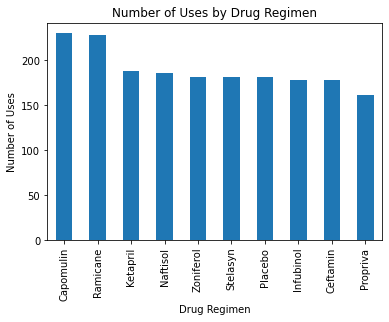

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drugs = mice.value_counts("Drug Regimen")
drugs.plot(kind="bar", title="Number of Uses by Drug Regimen")
plt.ylabel("Number of Uses")
plt.show()

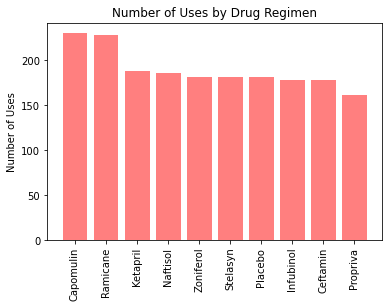

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(drugs))
tick_locations = [value for value in x_axis]
drugs = mice.value_counts("Drug Regimen")
drug_names = pd.DataFrame(drugs)
plt.bar(x_axis, drugs, color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, drug_names.index, rotation="vertical")
plt.title("Number of Uses by Drug Regimen")
plt.ylabel("Number of Uses")
plt.show()

<AxesSubplot:title={'center':'Female vs. Male Distribution'}, ylabel=' '>

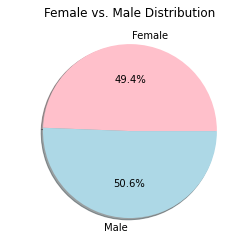

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mf = mice.groupby("Sex")["Mouse ID"].count()
mf.plot(kind="pie", title="Female vs. Male Distribution", ylabel=" ", 
        autopct="%1.1f%%", colors=["pink", "lightblue"], shadow=True)

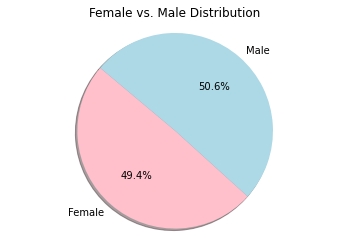

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mf = mice.groupby("Sex")["Mouse ID"].count()
labels = ["Female", "Male"]
plt.pie(mf, labels=labels, colors=["pink", "lightblue"], autopct="%1.1f%%", 
        shadow=True, startangle=140)
plt.axis("equal")
plt.title("Female vs. Male Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last = mice.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor = pd.merge(last, mice, how="inner", on=["Mouse ID", "Timepoint"])

#Display new df
final_tumor

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
q1 = final_tumor["Tumor Volume (mm3)"].quantile(0.25)
q3 = final_tumor["Tumor Volume (mm3)"].quantile(0.75)
iqr = q3 - q1


print(f'The first quartile is {q1}')
print(f'The third quartile is {q3}')
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:  
    tumor_vol = final_tumor["Tumor Volume (mm3)"].loc[final_tumor["Drug Regimen"] == treatment]
    # add subset
    tumor_vol_data.append(tumor_vol)
tumor_vol_data

# Determine outliers using upper and lower bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)


The first quartile is 45.93471217
The third quartile is 64.95756185


<ipython-input-24-3feb83fe4ac0>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treatments)


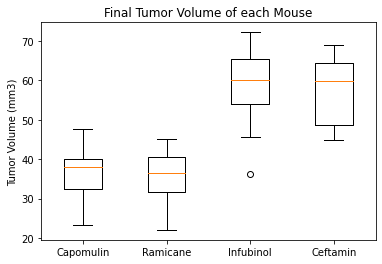

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of each Mouse')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xticklabels(treatments)
ax1.boxplot(tumor_vol_data)
plt.show()

## Line and Scatter Plots

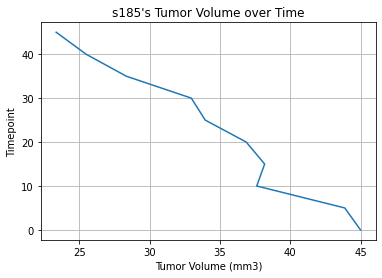

In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = mice.loc[mice["Drug Regimen"] == "Capomulin"]
mouse_id = "s185"
mouse_id_df = capomulin.loc[capomulin["Mouse ID"] == mouse_id]
plt.plot(mouse_id_df["Tumor Volume (mm3)"], mouse_id_df["Timepoint"], )
plt.title(f"{mouse_id}'s Tumor Volume over Time")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint")
plt.grid()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

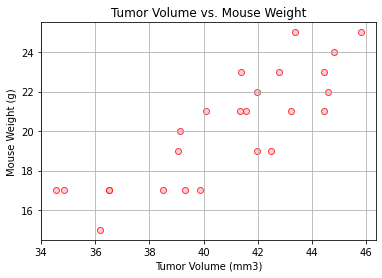

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor_volume = capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin.groupby("Mouse ID")["Weight (g)"].mean()
plt.scatter(avg_tumor_volume, mouse_weight, marker='o', facecolors="pink", 
           edgecolors="red", alpha=0.75)
plt.title("Tumor Volume vs. Mouse Weight")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")
plt.grid()
plt.show

## Correlation and Regression

The r-squared is: 0.7088568047708717


<function matplotlib.pyplot.show(close=None, block=None)>

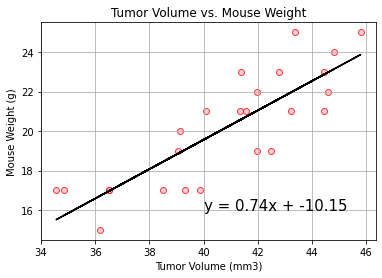

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
y_values = capomulin.groupby("Mouse ID")["Weight (g)"].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker='o', facecolors="pink", 
           edgecolors="red", alpha=0.75)
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(40,16),fontsize=15,color="black")
plt.title("Tumor Volume vs. Mouse Weight")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show